In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('MoviesOnStreamingPlatforms.csv')

In [3]:
df.head()

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [4]:
df = df.drop(['Unnamed: 0'],axis=1)
# dt.columns

In [5]:
df.head()

,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [6]:
df.describe()

,ID,Year,Netflix,Hulu,Prime Video,Disney+,Type
count,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.0
mean,4758.000000,2007.422386,0.388334,0.110037,0.432265,0.096900,0.0
std,2746.888239,19.130367,0.487397,0.312952,0.495417,0.295837,0.0
min,1.000000,1914.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2379.500000,2006.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,4758.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,7136.500000,2018.000000,1.000000,0.000000,1.000000,0.000000,0.0
max,9515.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [7]:
# here the Rotten tomaten and age value is not in int formate thats why it not show up here.

In [8]:
# First check the null values in the dataset.b

df.isnull().sum()

ID                    0
Title                 0
Year                  0
Age                4177
Rotten Tomatoes       7
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
dtype: int64

In [9]:
# Ohh the age feature has terrible amount of missing values, almost 50% but removing them not wise thing beacaue 
# it is  importan feature So, we think about this on letter stage not we should clean the data first, it is really important 
# to do further more work

In [10]:
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].apply(lambda x: int(x.split('/')[0]) if isinstance(x, str) else None)

In [11]:
# not its time for Age to clean, The values is in age is string cause of + (special charecter)  so we 

In [12]:
df['Age'].unique()

array(['18+', '7+', '13+', '16+', 'all', nan], dtype=object)

In [13]:
df['Age'].replace('all','0+',inplace=True)

In [14]:
# here first clean the data to make string to int 
# but it is a important data.
# ALse there is one instance alled 'all' in the data which represent all can see this show we can represent that with '0+'

In [15]:
df['Age'] = df['Age'].apply(lambda x: int(x[:-1]) if isinstance(x, str) else None)


In [16]:
df["Age"].unique()

array([18.,  7., 13., 16.,  0., nan])

In [17]:
df["Age"]

0       18.0
1        7.0
2        7.0
3        7.0
4       18.0
        ... 
9510     NaN
9511     NaN
9512     NaN
9513     NaN
9514     7.0
Name: Age, Length: 9515, dtype: float64

In [18]:
df['Age'].value_counts()

Age
18.0    2276
7.0     1090
13.0     998
0.0      698
16.0     276
Name: count, dtype: int64

In [19]:
df.describe()[['Age','Rotten Tomatoes']]

,Age,Rotten Tomatoes
count,5338.000000,9508.000000
mean,12.361933,53.545015
std,6.338357,13.197673
min,0.000000,10.000000
25%,7.000000,44.000000
50%,13.000000,52.000000
75%,18.000000,62.000000
max,18.000000,98.000000


([<matplotlib.patches.Wedge at 0x1bae89fb640>,
 [Text(0.2980081321631791, 1.2653818210977323, '18+'),
  Text(-1.0824412575459168, -0.19575730883523765, '7+'),
  Text(-0.17853296631537738, -1.0854151187166283, '13+'),
  Text(0.8155215679053535, -0.7381900651466357, 'All'),
  Text(1.085519999963705, -0.17789415302026557, '16+')],
 [Text(0.18338961979272558, 0.7786965052909122, '42.6%'),
  Text(-0.5904225041159545, -0.10677671391012962, '20.4%'),
  Text(-0.09738161799020582, -0.59204461020907, '18.7%'),
  Text(0.4448299461301927, -0.4026491264436194, '13.1%'),
  Text(0.5921018181620209, -0.09703317437469029, '5.2%')])

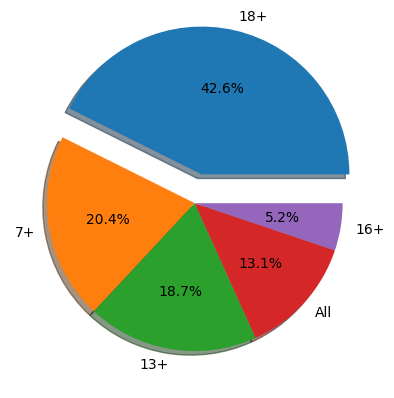

In [20]:
lebels = ['18+','7+','13+','All','16+']
explode =[0.2,0,0,0,0]
plt.pie(df['Age'].value_counts(), labels=lebels, explode=explode, autopct='%1.1f%%', shadow=True)

In [21]:
df.dropna(inplace=True)

In [22]:
from scipy.stats import ttest_ind

# Assuming `disney_age` and `netflix_age` are lists or arrays of age restriction values for each platform
disney_age = list(df[df['Disney+'] ==1]['Age'])
netflix_age = list(df[df.Netflix ==1]['Age'])

# Perform a one-tailed t-test
t_stat, p_value = ttest_ind(disney_age, netflix_age, alternative='less', equal_var=False)  # use equal_var=True if variances are equal

# Display results
print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: -44.34655792141504
p-value: 1.0319486549544553e-279


In [23]:
## Here we have Negative t-statistic, a large negative t-statistic suggests a significant difference nevigate that,
# where Disney+’s mean age rating is considerably lower than Netflix's mean age rating.

## Here p-value is low(p<= 0.05), Thus Hypothetically Disney has low age restriction campare to Netflix.

In [24]:
# Assuming `disney_scores` and `netflix_scores` are lists or arrays of Rotten Tomatoes scores for Disney+ and Netflix movies
disney_scores = list(df[df['Disney+'] ==1]['Rotten Tomatoes'])
netflix_scores = list(df[df['Netflix'] ==1]['Rotten Tomatoes'])

# Perform a two-tailed t-test
t_stat, p_value = ttest_ind(disney_scores, netflix_scores, equal_var=False)  # Use equal_var=True if variances are equal

# Display results
print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: 2.249268405929175
p-value: 0.024662982791478848


In [25]:
# The p-value of 0.025 is below the commonly used significance level of 0.05. Therefore,

# There is statistically significant evidence to reject the null hypothesis.
# We can conclude with 95% confidence that there is a significant difference in Rotten Tomatoes scores between 
# movies on Disney+ and Netflix.

In [26]:
# Do movies available on one streaming platform tend to have lower age restrictions than those on another platform? 
# This will help determine whether certain platforms cater to younger audiences by offering content with 
# lower age restrictions.

In [27]:
# do in each movie platform's age restriction and make them plot 

In [29]:
# are the movies on Netflix in general better than those on Disney+?
# Use the Rotten Tomatoes score to answer this question.

In [30]:
df

,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,The Irishman,2019,18.0,98.0,1,0,0,0,0
1,2,Dangal,2016,7.0,97.0,1,0,0,0,0
2,3,David Attenborough: A Life on Our Planet,2020,7.0,95.0,1,0,0,0,0
3,4,Lagaan: Once Upon a Time in India,2001,7.0,94.0,1,0,0,0,0
4,5,Roma,2018,18.0,94.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9503,9504,Disney My Music Story: Sukima Switch,2021,16.0,16.0,0,0,0,1,0
9505,9506,Great Shark Chow Down,2019,7.0,14.0,0,0,0,1,0
9507,9508,Texas Storm Squad,2020,13.0,14.0,0,0,0,1,0
9508,9509,What the Shark?,2020,13.0,14.0,0,0,0,1,0


In [44]:
age=[0,7,13,16,18]
name=['Netflix', 'Disney+','Prime Video','Hulu']

In [45]:
dic_plat={}
for i in name:
    dic_age={}
    for j in age:
        dic_age[j]= df[df[i]==1][df[df[i]==1]['Age']==j]['Rotten Tomatoes'].mean()
    dic_plat[i] = dic_age


In [46]:
dic_plat

{'Netflix': {0: 51.84027777777778,
  7: 58.09316770186335,
  13: 62.32920792079208,
  16: 58.64238410596027,
  18: 62.28164196123147},
 'Disney+': {0: 59.6027027027027,
  7: 62.701438848920866,
  13: 70.81428571428572,
  16: 44.25,
  18: 55.0},
 'Prime Video': {0: 49.4625,
  7: 52.719714964370546,
  13: 56.90680100755667,
  16: 49.49484536082474,
  18: 55.321100917431195},
 'Hulu': {0: 54.30555555555556,
  7: 61.91836734693877,
  13: 65.80571428571429,
  16: 57.38461538461539,
  18: 64.16187989556136}}

Text(0, 0.5, 'Rotten Tomatoes score')

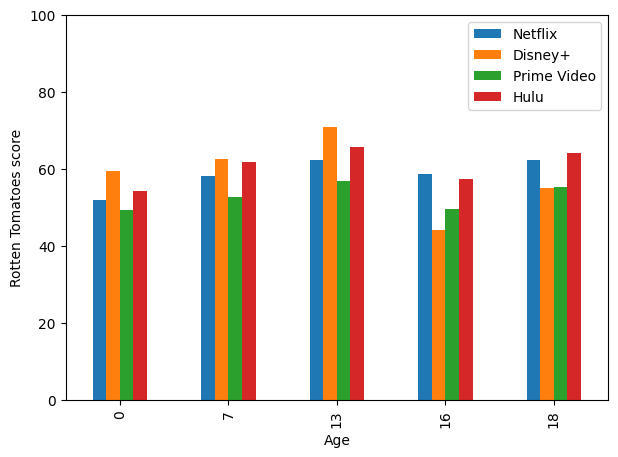

In [47]:
temp_df = pd.DataFrame(dic_plat)
temp_df.plot(kind='bar', figsize=(7 ,5), width=0.5)
plt.yticks(range(0, 101, 20)) 
plt.xlabel("Age")
plt.ylabel('Rotten Tomatoes score')

In [48]:
import scipy.stats as stats

# Example data
disney_ages = list(df[df["Disney+"]==1]["Age"])  # Replace with actual age ratings
netflix_ages = list(df[df["Netflix"]==1]["Age"])  # Replace with actual age ratings

# Normality check
disney_normal = stats.shapiro(disney_ages)
netflix_normal = stats.shapiro(netflix_ages)

# Homogeneity of variances
levene_test = stats.levene(disney_ages, netflix_ages)

# Perform t-test or Mann-Whitney U test based on assumptions
if disney_normal.pvalue > 0.05 and netflix_normal.pvalue > 0.05:  # Normal data
    if levene_test.pvalue > 0.05:  # Equal variances
        t_stat, p_value = stats.ttest_ind(disney_ages, netflix_ages, alternative='less')
    else:  # Unequal variances
        t_stat, p_value = stats.ttest_ind(disney_ages, netflix_ages, alternative='less', equal_var=False)
else:  # Non-normal data
    u_stat, p_value = stats.mannwhitneyu(disney_ages, netflix_ages, alternative='less')

print("P-value:", p_value)


P-value: 2.656927667628983e-212


In [49]:
# We typically use alpha= 0.05. This means:
# • If p < 0.05: Reject the null hypothesis (Ho).
# • If p > 0.05: Fail to reject the null hypothesis.

In [50]:
# Interpret Results
# • If p < alpha, reject Ho: There is evidence that Disney+ has a lower average age restriction than
# Netflix.
# • If p 2 alpha, fail to reject Ho: There is no significant evidence that Disney+ has a lower average age
# restriction than Netflix.

In [52]:
import scipy.stats as stats

# Example data
disney_rotten = list(df[df["Disney+"]==1]["Rotten Tomatoes"])  # Replace with actual age ratings
netflix_rotten = list(df[df["Netflix"]==1]["Rotten Tomatoes"])  # Replace with actual age ratings

# Normality check
disney_normal = stats.shapiro(disney_rotten)
netflix_normal = stats.shapiro(netflix_rotten)

# Homogeneity of variances
levene_test = stats.levene(disney_rotten, netflix_rotten)

# Perform t-test or Mann-Whitney U test based on assumptions
if disney_normal.pvalue > 0.05 and netflix_normal.pvalue > 0.05:  # Normal data
    if levene_test.pvalue > 0.05:  # Equal variances
        t_stat, p_value = stats.ttest_ind(disney_rotten, netflix_rotten, alternative='less')
    else:  # Unequal variances
        t_stat, p_value = stats.ttest_ind(disney_rotten, netflix_rotten, alternative='less', equal_var=False)
else:  # Non-normal data
    u_stat, p_value = stats.mannwhitneyu(disney_rotten, netflix_rotten, alternative='less')

print("P-value:", p_value)
print("t-stat:", t_stat)


P-value: 0.9924070469853369
t-stat: 2.249268405929175


In [40]:
# • If we use alpha = 0.05 (a common significance level):
#     p 0.99 > 0.05, so we fail to reject the null hypothesis (Ho).

In [41]:
# There is no significant evidence to suggest that the Rotten Tomatoes scores 
# for movies on the two platforms are different. 
# The data strongly supports the idea that their scores are statistically similar.